Detalhamento do quantitativo de Cursos de Graduação (Licenciatura, Bacharelado, Tecnológico, Sequencial e ABI - Área Básica de Ingresso) no Brasil por:  código da Instituição de Educação Superior (IES); nome da IES; categoria da IES; organização acadêmica; código do curso; nome do curso; grau; área OCDE; modalidade de ensino (presencial ou EaD); situação do curso (ativo ou inativo); vagas autorizadas; carga horária; segmentadas por código do município (IBGE); município; UF; região. 

DADOS DA TABELA

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

tabela = pd.read_csv("PDA_Dados_Cursos_Graduacao_Brasil.csv")
display(tabela)

,CODIGO_IES,NOME_IES,CATEGORIA_ADMINISTRATIVA,ORGANIZACAO_ACADEMICA,CODIGO_CURSO,NOME_CURSO,GRAU,AREA_OCDE,MODALIDADE,SITUACAO_CURSO,QT_VAGAS_AUTORIZADAS,CARGA_HORARIA,CODIGO_AREA_OCDE_CINE,AREA_OCDE_CINE,CODIGO_MUNICIPIO,MUNICIPIO,UF,REGIAO
0,4751,CENTRO UNIVERSITÁRIO UNIFATECIE,Privada com fins lucrativos,Centro Universitário,1556773,ENGENHARIA AGRONÔMICA,Bacharelado,Agronomia,Educação a Distância,Em atividade,1000,4400,301,Agronomia,3541406,Presidente Prudente,SP,SUDESTE
1,1491,CENTRO UNIVERSITÁRIO INTERNACIONAL,Privada com fins lucrativos,Centro Universitário,1186955,LETRAS,Licenciatura,Formação de professor de língua/literatura ver...,Educação a Distância,Em atividade,3000,3992,58,Formação de professor de língua/literatura ver...,2516201,Sousa,PB,NORDESTE
2,1472,CENTRO UNIVERSITÁRIO LEONARDO DA VINCI,Privada com fins lucrativos,Centro Universitário,99950,GEOGRAFIA,Licenciatura,Formação de professor de geografia,Educação a Distância,Em atividade,7620,3500,39,Formação de professor de geografia,2800308,Aracaju,SE,NORDESTE
3,221,UNIVERSIDADE CRUZEIRO DO SUL,Privada com fins lucrativos,Universidade,1467998,EDUCAÇÃO FÍSICA,Bacharelado,Educação física,Educação a Distância,Em atividade,1200,3200,328,Educação física,4113205,Lapa,PR,SUL
4,1472,CENTRO UNIVERSITÁRIO LEONARDO DA VINCI,Privada com fins lucrativos,Centro Universitário,1516788,SERVIÇOS PENAIS,Tecnológico,NaN,Educação a Distância,Em atividade,1500,1980,357,Serviços penais,2601706,Belo Jardim,PE,NORDESTE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902671,163,UNIVERSIDADE ESTÁCIO DE SÁ,Privada com fins lucrativos,Universidade,1518220,CIÊNCIA DE DADOS,Tecnológico,NaN,Educação a Distância,Em atividade,2589,2086,456,Ciência de dados,4300604,Alvorada,RS,SUL
902672,1491,CENTRO UNIVERSITÁRIO INTERNACIONAL,Privada com fins lucrativos,Centro Universitário,1468267,MÚSICA,Licenciatura,Formação de professor de música,Educação a Distância,Em atividade,1700,3992,42,Formação de professor de música,2704302,Maceió,AL,NORDESTE
902673,1491,CENTRO UNIVERSITÁRIO INTERNACIONAL,Privada com fins lucrativos,Centro Universitário,1185929,CIÊNCIAS CONTÁBEIS,Bacharelado,Ciências contábeis,Educação a Distância,Em atividade,4500,3260,138,Ciências contábeis,3554003,Tatuí,SP,SUDESTE
902674,298,Universidade Pitágoras Unopar Anhanguera,Privada com fins lucrativos,Universidade,97329,MARKETING,Tecnológico,NaN,Educação a Distância,Em atividade,6000,1700,158,Marketing,2601102,Araripina,PE,NORDESTE


NUMERO DE VAGAS POR REGIÃO DO BRASIL

In [31]:
df = pd.DataFrame(tabela)

qtd_vagas = tabela[["REGIAO", "QT_VAGAS_AUTORIZADAS"]].groupby(["REGIAO"]).sum( "QT_VAGAS_AUTORIZADAS")

regiao = tabela['REGIAO']

display(qtd_vagas)

qtd_vagas.to_excel("vagas_regiao.xlsx")

,QT_VAGAS_AUTORIZADAS
REGIAO,
CENTRO-OESTE,620100529
IGNORADO/EXTERIOR,5854628
NORDESTE,1218963125
NORTE,637651691
SUDESTE,2333028227
SUL,944563809


GRAFICO EM PIZZA DE VAGAS POR REGIÃO DO BRASIL

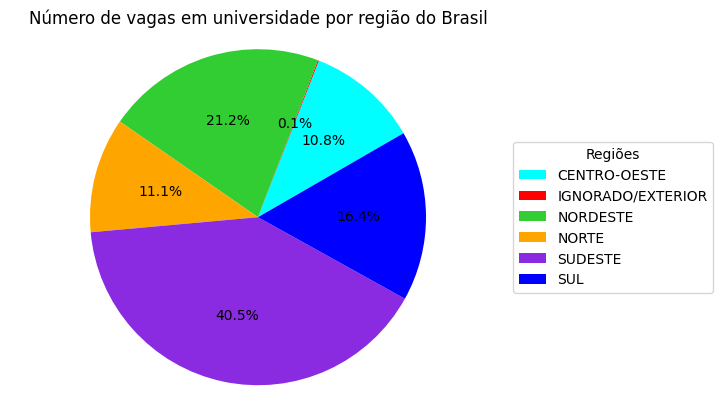

In [32]:
tabela2 = pd.read_excel("vagas_regiao.xlsx")

regiao = tabela2['REGIAO']
qtd_vagas = tabela2['QT_VAGAS_AUTORIZADAS']

plt.title("Número de vagas em universidade por região do Brasil")


cores = ['#00FFFF', '#FF0000', '#32CD32', '#FFA500', '#8A2BE2', '#0000FF']
plt.pie(qtd_vagas, colors=cores, startangle=30, autopct="%1.1f%%")

legendas = plt.legend(regiao, title="Regiões", bbox_to_anchor=(1, 0.5), loc="center left")

plt.savefig('grafico_01.png', bbox_inches='tight')

plt.axis('equal')
plt.show()

analise de vagas por UF

In [33]:
df2 = pd.DataFrame(tabela)

qtd_vagas_regiao_uf = tabela[["UF", "REGIAO", "QT_VAGAS_AUTORIZADAS"]].groupby(["UF", "REGIAO"]).sum("QT_VAGAS_AUTORIZADAS")

display(qtd_vagas_regiao_uf)

qtd_vagas_regiao_uf.to_excel("vagas_regiao_uf.xlsx")

,,QT_VAGAS_AUTORIZADAS
UF,REGIAO,
AC,NORTE,38903895
AL,NORDESTE,58705468
AM,NORTE,102226295
AP,NORTE,20008927
BA,NORDESTE,375491164
CE,NORDESTE,201594349
DF,CENTRO-OESTE,10820704
ES,SUDESTE,169995014
GO,CENTRO-OESTE,300668161


analise de vagas na regiao sudeste POR UF

In [34]:
tabela3 = pd.read_excel("vagas_regiao_uf.xlsx")

df3 = pd.DataFrame(tabela)

regiao_sudeste = df2[df2['REGIAO'] == 'SUDESTE']

cidades_sudeste = regiao_sudeste [["UF", "QT_VAGAS_AUTORIZADAS"]].groupby("UF").sum()

display(cidades_sudeste)

cidades_sudeste.to_excel("vagas_regiao_sudeste.xlsx")

,QT_VAGAS_AUTORIZADAS
UF,
ES,169995014
MG,665460803
RJ,229712214
SP,1267860196


GRAFICO EM PIZZA DE VAGAS NA REGIÃO SUDESTE POR UF

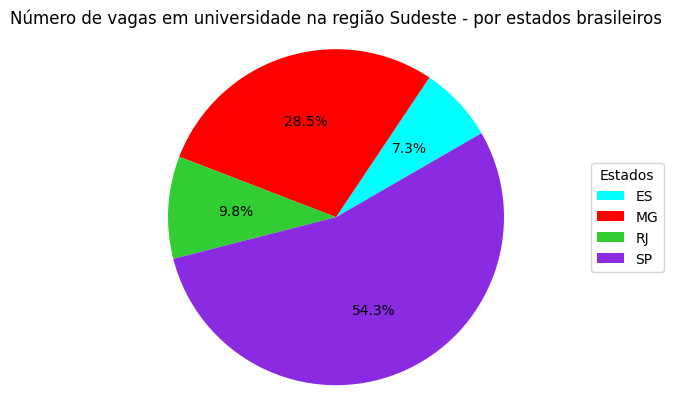

In [35]:
tabela4 = pd.read_excel("vagas_regiao_sudeste.xlsx")

regiao_sudeste = tabela4['UF']
qtd_vagas_sudeste = tabela4['QT_VAGAS_AUTORIZADAS']

plt.title("Número de vagas em universidade na região Sudeste - por estados brasileiros")


cores = ['#00FFFF', '#FF0000', '#32CD32','#8A2BE2', '#0000FF']
plt.pie(qtd_vagas_sudeste, colors=cores, startangle=30, autopct="%1.1f%%")

legendas = plt.legend(regiao_sudeste, title="Estados", bbox_to_anchor=(1, 0.5), loc="center left")

plt.savefig('grafico_02.png', bbox_inches='tight')

plt.axis('equal')
plt.show()

analise de vagas na regiao NORDESTE POR UF

In [36]:
tabela3 = pd.read_excel("vagas_regiao_uf.xlsx")

df4 = pd.DataFrame(tabela)

regiao_nordeste = df2[df2['REGIAO'] == 'NORDESTE']

cidades_nordeste = regiao_nordeste [["UF", "QT_VAGAS_AUTORIZADAS"]].groupby("UF").sum()

display(cidades_nordeste)

cidades_nordeste.to_excel("vagas_regiao_nordeste.xlsx")

,QT_VAGAS_AUTORIZADAS
UF,
AL,58705468
BA,375491164
CE,201594349
MA,142542793
PB,97732233
PE,179880588
PI,63412419
RN,57089231
SE,42514880


GRAFICO EM PIZZA DE VAGAS NA REGIÃO NORDESTE POR UF

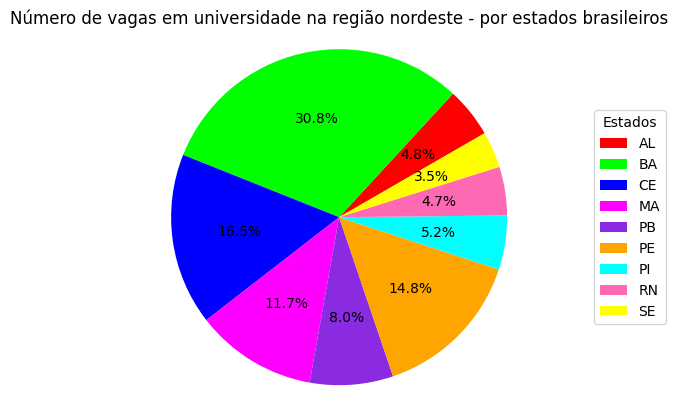

In [37]:
tabela5 = pd.read_excel("vagas_regiao_nordeste.xlsx")

regiao_nordeste = tabela5['UF']
qtd_vagas_nordeste = tabela5['QT_VAGAS_AUTORIZADAS']

plt.title("Número de vagas em universidade na região nordeste - por estados brasileiros")


cores2 = ['#FF0000', '#00FF00', '#0000FF','#FF00FF', '#8A2BE2', '#FFA500', '#00FFFF', '#FF69B4', '#FFFF00']
plt.pie(qtd_vagas_nordeste, colors=cores2, startangle=30, autopct="%1.1f%%")

legendas = plt.legend(regiao_nordeste, title="Estados", bbox_to_anchor=(1, 0.5), loc="center left")

plt.savefig('grafico_03.png', bbox_inches='tight')

plt.axis('equal')
plt.show()

ANALISE DAS MODALIDADES NA REGIAO SUDESTE

In [38]:
tabela = pd.read_csv("PDA_Dados_Cursos_Graduacao_Brasil.csv")

df5 = pd.DataFrame(tabela)

modalidade_sudeste = df[df['REGIAO'] == 'SUDESTE']

modalidades_sudeste = modalidade_sudeste [["REGIAO", "MODALIDADE", "QT_VAGAS_AUTORIZADAS"]].groupby(["REGIAO", "MODALIDADE"]).sum()

display(modalidades_sudeste)

modalidades_sudeste.to_excel("modalidades_regiao_sudeste.xlsx")

QT_VAGAS_AUTORIZADAS
REGIAO  MODALIDADE                                
SUDESTE Educação Presencial                4347355
        Educação a Distância            2328680872

gráfico em pizza das modalidades na região sudeste

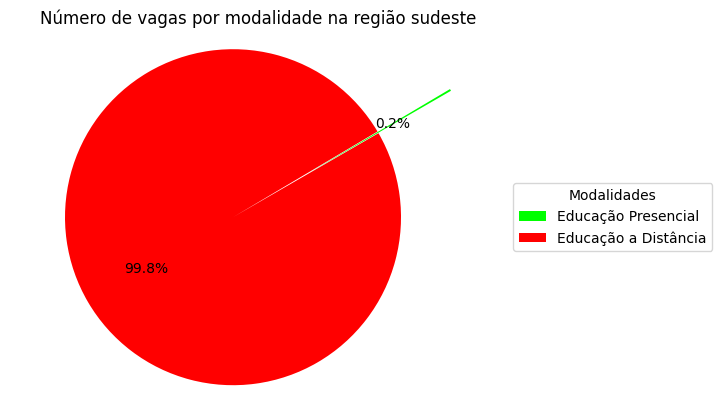

In [53]:

tabela6 = pd.read_excel("modalidades_regiao_sudeste.xlsx")

qtd_vagas__modalidade_sudeste = tabela6['QT_VAGAS_AUTORIZADAS']

modalidades = tabela6['MODALIDADE']


plt.title("Número de vagas por modalidade na região sudeste")

explo = (0, 0.5)

cores3 = ['#00FF00', '#FF0000']
plt.pie(qtd_vagas__modalidade_sudeste, explode=explo, colors=cores3, startangle=30, autopct="%1.1f%%")

legendas = plt.legend(modalidades, title="Modalidades", bbox_to_anchor=(1, 0.5), loc="center left")

plt.savefig('grafico_04.png', bbox_inches='tight')

plt.axis('equal')
plt.show()


ANALISE DAS MODALIDADES NA REGIAO nordeste

In [49]:
tabela = pd.read_csv("PDA_Dados_Cursos_Graduacao_Brasil.csv")

df5 = pd.DataFrame(tabela)

modalidade_nordeste = df[df['REGIAO'] == 'NORDESTE']

modalidades_nordeste = modalidade_nordeste [["REGIAO", "MODALIDADE", "QT_VAGAS_AUTORIZADAS"]].groupby(["REGIAO", "MODALIDADE"]).sum()

display(modalidades_nordeste)

modalidades_sudeste.to_excel("modalidades_regiao_nordeste.xlsx")

QT_VAGAS_AUTORIZADAS
REGIAO   MODALIDADE                                
NORDESTE Educação Presencial                1796982
         Educação a Distância            1217166143

gráfico em pizza das modalidades da região nordeste

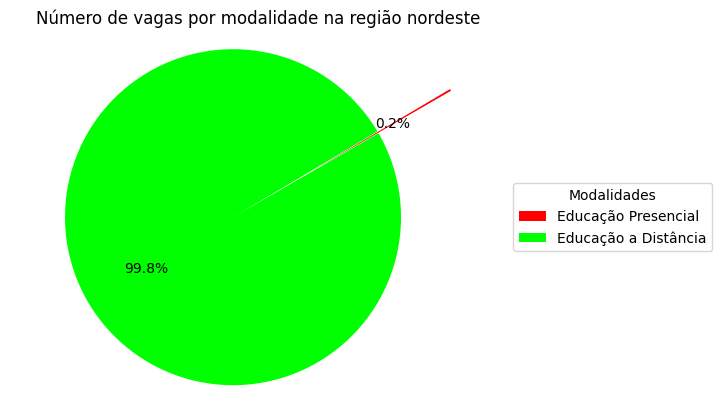

In [54]:
tabela7 = pd.read_excel("modalidades_regiao_nordeste.xlsx")

qtd_vagas__modalidade_nordeste = tabela7['QT_VAGAS_AUTORIZADAS']

modalidades_nord = tabela7['MODALIDADE']


plt.title("Número de vagas por modalidade na região nordeste")

explo = (0, 0.5)

cores3 = ['#FF0000', '#00FF00']
plt.pie(qtd_vagas__modalidade_nordeste, explode=explo, colors=cores3, startangle=30, autopct="%1.1f%%")

legendas = plt.legend(modalidades_nord, title="Modalidades", bbox_to_anchor=(1, 0.5), loc="center left")

plt.savefig('grafico_05.png', bbox_inches='tight')

plt.axis('equal')
plt.show()